**Import libraries and Read Data**

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import json
import re
import nltk

In [5]:
movies_df = pd.read_csv("source_data/movies_metadata.csv")
credits_df = pd.read_csv("source_data/credits.csv")
links_sm_df = pd.read_csv("source_data/links_small.csv")
ratings_sm_df = pd.read_csv("source_data/ratings_small.csv")
tmdb5000_credits_df  = pd.read_csv("source_data/tmdb_5000_credits.csv")
tmdb5000_movies_df = pd.read_csv("source_data/tmdb_5000_movies.csv")
pd.set_option('display.max_columns', None)

C:\Users\chanc\AppData\Local\Temp\ipykernel_5296\329342016.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  movies_df = pd.read_csv("source_data/movies_metadata.csv")


In [6]:
movies_df.head(2)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0


**Remove all NaN Values**

In [7]:
# Dropping Rows with Any "NaN" Values
movies_df = movies_df.dropna() 

**Delete and Renaming the columns**

In [8]:
# Delete Columns "homepage", "from the movies_df 
movies_df.drop(columns=["homepage", "poster_path"], axis=1, inplace=True)

In [9]:
# Rename all columns from movies_df
movies_df.rename(columns={"adult": "Adult", "belongs_to_collection": "Movie_Collection", "budget": "Budget", "genres": "Genres", "id": "ID", "imdb_id": "IMDB_ID", "original_language": "Original_Language", "original_title": "Original_Title", "overview": "Overview", "popularity": "Popularity", "production_companies": "Production_Companies", "production_countries": "Production_Countries", "release_date": "Release_Date", "revenue": "Revenue", "runtime": "Runtime", "spoken_languages": "Spoken_languages", "status":"Status", "tagline":"Tagline", "title":"Title", "video":"Video", "vote_average":"Ratings", "vote_count":"Voters_Count"}, inplace=True)

**Parse JSON into String for Genres**

In [10]:
def parse_genres(genre_str):
    genres = json.loads(genre_str.replace("\'", "\""))
    return pd.Series({
        "Id": [genre["id"] for genre in genres],
        "Genres": [genre["name"] for genre in genres]
    })

if "Genres" in movies_df.columns:
    movies_df[["Id", "Genres"]] = movies_df["Genres"].apply(parse_genres)

In [11]:
movies_df = movies_df.drop(columns=["Id"])

In [12]:
movies_df.head()

,Adult,Movie_Collection,Budget,Genres,ID,IMDB_ID,Original_Language,Original_Title,Overview,Popularity,Production_Companies,Production_Countries,Release_Date,Revenue,Runtime,Spoken_languages,Status,Tagline,Title,Video,Ratings,Voters_Count
9,False,"{'id': 645, 'name': 'James Bond Collection', '...",58000000,"[Adventure, Action, Thriller]",710,tt0113189,en,GoldenEye,James Bond must unmask the mysterious head of ...,14.686036,"[{'name': 'United Artists', 'id': 60}, {'name'...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",1995-11-16,352194034.0,130.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,No limits. No fears. No substitutes.,GoldenEye,False,6.6,1194.0
68,False,"{'id': 43563, 'name': 'Friday Collection', 'po...",3500000,[Comedy],10634,tt0113118,en,Friday,Craig and Smokey are two guys in Los Angeles h...,14.56965,"[{'name': 'New Line Cinema', 'id': 12}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-04-26,28215918.0,91.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A lot can go down between thursday and saturda...,Friday,False,7.0,513.0
69,False,"{'id': 10924, 'name': 'From Dusk Till Dawn Col...",19000000,"[Horror, Action, Thriller, Crime]",755,tt0116367,en,From Dusk Till Dawn,Seth Gecko and his younger brother Richard are...,15.339153,"[{'name': 'A Band Apart', 'id': 59}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",1996-01-19,25836616.0,108.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,One night is all that stands between them and ...,From Dusk Till Dawn,False,6.9,1644.0
153,False,"{'id': 439053, 'name': 'Brooklyn Cigar Store C...",2000000,[Comedy],5894,tt0112541,en,Blue in the Face,"Auggie runs a small tobacco shop in Brooklyn, ...",11.528147,"[{'name': 'Miramax Films', 'id': 14}, {'name':...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-09-15,1275000.0,83.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Welcome to the planet Brooklyn.,Blue in the Face,False,6.8,28.0
178,False,"{'id': 286162, 'name': 'Power Rangers Collecti...",15000000,"[Action, Adventure, Science Fiction, Family, F...",9070,tt0113820,en,Mighty Morphin Power Rangers: The Movie,Power up with six incredible teens who out-man...,7.024227,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_...",1995-06-30,66000000.0,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Power Is On!,Mighty Morphin Power Rangers: The Movie,False,5.2,153.0


**Parse JSON into String for Movies Collection**

In [13]:
def parse_collection(collection_str):
    try:
        collection = json.loads(collection_str.replace("\'", "\""))
        return pd.Series({
            "Collection_id": collection.get("id"),
            "Collection_Name": collection.get("name"),
            "Poster_Path": collection.get("poster_path"),
            "Backdrop_Path": collection.get("backdrop_path")
        })
    except (json.JSONDecodeError, TypeError, AttributeError):
        return pd.Series([None, None, None, None], index=["Collection_id", "Collection_Name", "Poster_Path", "Backdrop_Path"])

if "Movie_Collection" in movies_df.columns:
    movies_df[["Collection_id", "Collection_Name", "Poster_Path", "Backdrop_Path"]] = movies_df["Movie_Collection"].apply(parse_collection)

In [14]:
movies_df = movies_df.drop(columns=['Movie_Collection', 'Collection_id', 'Poster_Path', 'Backdrop_Path'])


In [15]:
cols = list(movies_df.columns)
cols.insert(1, cols.pop(cols.index('Collection_Name')))
movies_df = movies_df[cols]



In [16]:
movies_df.head()

,Adult,Collection_Name,Budget,Genres,ID,IMDB_ID,Original_Language,Original_Title,Overview,Popularity,Production_Companies,Production_Countries,Release_Date,Revenue,Runtime,Spoken_languages,Status,Tagline,Title,Video,Ratings,Voters_Count
9,False,James Bond Collection,58000000,"[Adventure, Action, Thriller]",710,tt0113189,en,GoldenEye,James Bond must unmask the mysterious head of ...,14.686036,"[{'name': 'United Artists', 'id': 60}, {'name'...","[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...",1995-11-16,352194034.0,130.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,No limits. No fears. No substitutes.,GoldenEye,False,6.6,1194.0
68,False,Friday Collection,3500000,[Comedy],10634,tt0113118,en,Friday,Craig and Smokey are two guys in Los Angeles h...,14.56965,"[{'name': 'New Line Cinema', 'id': 12}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-04-26,28215918.0,91.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A lot can go down between thursday and saturda...,Friday,False,7.0,513.0
69,False,From Dusk Till Dawn Collection,19000000,"[Horror, Action, Thriller, Crime]",755,tt0116367,en,From Dusk Till Dawn,Seth Gecko and his younger brother Richard are...,15.339153,"[{'name': 'A Band Apart', 'id': 59}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",1996-01-19,25836616.0,108.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,One night is all that stands between them and ...,From Dusk Till Dawn,False,6.9,1644.0
153,False,Brooklyn Cigar Store Collection,2000000,[Comedy],5894,tt0112541,en,Blue in the Face,"Auggie runs a small tobacco shop in Brooklyn, ...",11.528147,"[{'name': 'Miramax Films', 'id': 14}, {'name':...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-09-15,1275000.0,83.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Welcome to the planet Brooklyn.,Blue in the Face,False,6.8,28.0
178,False,Power Rangers Collection,15000000,"[Action, Adventure, Science Fiction, Family, F...",9070,tt0113820,en,Mighty Morphin Power Rangers: The Movie,Power up with six incredible teens who out-man...,7.024227,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_...",1995-06-30,66000000.0,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Power Is On!,Mighty Morphin Power Rangers: The Movie,False,5.2,153.0


**Parse JSON into String for Production_Companies**

In [17]:
def parse_prod_companies(companies_str):
    if isinstance(companies_str, str):
        try:
            companies = json.loads(companies_str.replace("'", '"'))
            company_names = [company.get("name") for company in companies]
            company_ids = [company.get("id") for company in companies]
            return pd.Series({
                "Company_Names": company_names,
                "Company_Ids": company_ids
            })
        except (json.JSONDecodeError, KeyError):
            pass
    return pd.Series({"Company_Names": None, "Company_Ids": None})

if "Production_Companies" in movies_df.columns:
    movies_df[["Company_Names", "Company_Ids"]] = movies_df["Production_Companies"].apply(parse_prod_companies)


In [18]:
movies_df = movies_df.drop(columns=['Company_Ids', "Production_Companies"])


In [19]:
movies_df.rename(columns={"Company_Names":"Production_Companies"}, inplace=True)

In [20]:
cols = list(movies_df.columns)
cols.insert(11, cols.pop(cols.index('Production_Companies')))
movies_df = movies_df[cols]



In [21]:
movies_df.head()

,Adult,Collection_Name,Budget,Genres,ID,IMDB_ID,Original_Language,Original_Title,Overview,Popularity,Production_Countries,Production_Companies,Release_Date,Revenue,Runtime,Spoken_languages,Status,Tagline,Title,Video,Ratings,Voters_Count
9,False,James Bond Collection,58000000,"[Adventure, Action, Thriller]",710,tt0113189,en,GoldenEye,James Bond must unmask the mysterious head of ...,14.686036,"[{'iso_3166_1': 'GB', 'name': 'United Kingdom'...","[United Artists, Eon Productions]",1995-11-16,352194034.0,130.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,No limits. No fears. No substitutes.,GoldenEye,False,6.6,1194.0
68,False,Friday Collection,3500000,[Comedy],10634,tt0113118,en,Friday,Craig and Smokey are two guys in Los Angeles h...,14.56965,"[{'iso_3166_1': 'US', 'name': 'United States o...",[New Line Cinema],1995-04-26,28215918.0,91.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A lot can go down between thursday and saturda...,Friday,False,7.0,513.0
69,False,From Dusk Till Dawn Collection,19000000,"[Horror, Action, Thriller, Crime]",755,tt0116367,en,From Dusk Till Dawn,Seth Gecko and his younger brother Richard are...,15.339153,"[{'iso_3166_1': 'US', 'name': 'United States o...","[A Band Apart, Dimension Films, Los Hooligans ...",1996-01-19,25836616.0,108.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,One night is all that stands between them and ...,From Dusk Till Dawn,False,6.9,1644.0
153,False,Brooklyn Cigar Store Collection,2000000,[Comedy],5894,tt0112541,en,Blue in the Face,"Auggie runs a small tobacco shop in Brooklyn, ...",11.528147,"[{'iso_3166_1': 'US', 'name': 'United States o...","[Miramax Films, InterAL]",1995-09-15,1275000.0,83.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Welcome to the planet Brooklyn.,Blue in the Face,False,6.8,28.0
178,False,Power Rangers Collection,15000000,"[Action, Adventure, Science Fiction, Family, F...",9070,tt0113820,en,Mighty Morphin Power Rangers: The Movie,Power up with six incredible teens who out-man...,7.024227,"[{'iso_3166_1': 'JP', 'name': 'Japan'}, {'iso_...","[Twentieth Century Fox Film Corporation, Saban...",1995-06-30,66000000.0,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Power Is On!,Mighty Morphin Power Rangers: The Movie,False,5.2,153.0


**Parse JSON into String for Production_Country**

In [22]:
def parse_prod_countries(countries_str):
    try:
        countries = json.loads(countries_str.replace("\'", "\""))
        return pd.Series({
            "Country_Names": [country.get("name") for country in countries],
            "ISO_Codes": [country.get("iso") for country in countries]
        })
    except (json.JSONDecodeError, TypeError):
        return pd.Series({"Country_Names": None, "ISO_Codes": None})

if "Production_Countries" in movies_df.columns:
    movies_df[["Country_Names", "ISO_Codes"]] = movies_df["Production_Countries"].apply(parse_prod_countries)


In [23]:
movies_df = movies_df.drop(columns=['Production_Countries', 'ISO_Codes'])

In [24]:
movies_df.rename(columns={"Country_Names":"Production_Country"}, inplace=True)

In [25]:
cols = list(movies_df.columns)
cols.insert(10, cols.pop(cols.index('Production_Country')))
movies_df = movies_df[cols]

In [26]:
movies_df.head()

,Adult,Collection_Name,Budget,Genres,ID,IMDB_ID,Original_Language,Original_Title,Overview,Popularity,Production_Country,Production_Companies,Release_Date,Revenue,Runtime,Spoken_languages,Status,Tagline,Title,Video,Ratings,Voters_Count
9,False,James Bond Collection,58000000,"[Adventure, Action, Thriller]",710,tt0113189,en,GoldenEye,James Bond must unmask the mysterious head of ...,14.686036,"[United Kingdom, United States of America]","[United Artists, Eon Productions]",1995-11-16,352194034.0,130.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,No limits. No fears. No substitutes.,GoldenEye,False,6.6,1194.0
68,False,Friday Collection,3500000,[Comedy],10634,tt0113118,en,Friday,Craig and Smokey are two guys in Los Angeles h...,14.56965,[United States of America],[New Line Cinema],1995-04-26,28215918.0,91.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,A lot can go down between thursday and saturda...,Friday,False,7.0,513.0
69,False,From Dusk Till Dawn Collection,19000000,"[Horror, Action, Thriller, Crime]",755,tt0116367,en,From Dusk Till Dawn,Seth Gecko and his younger brother Richard are...,15.339153,[United States of America],"[A Band Apart, Dimension Films, Los Hooligans ...",1996-01-19,25836616.0,108.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,One night is all that stands between them and ...,From Dusk Till Dawn,False,6.9,1644.0
153,False,Brooklyn Cigar Store Collection,2000000,[Comedy],5894,tt0112541,en,Blue in the Face,"Auggie runs a small tobacco shop in Brooklyn, ...",11.528147,[United States of America],"[Miramax Films, InterAL]",1995-09-15,1275000.0,83.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Welcome to the planet Brooklyn.,Blue in the Face,False,6.8,28.0
178,False,Power Rangers Collection,15000000,"[Action, Adventure, Science Fiction, Family, F...",9070,tt0113820,en,Mighty Morphin Power Rangers: The Movie,Power up with six incredible teens who out-man...,7.024227,"[Japan, United States of America]","[Twentieth Century Fox Film Corporation, Saban...",1995-06-30,66000000.0,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Power Is On!,Mighty Morphin Power Rangers: The Movie,False,5.2,153.0


**Parse JSON into String for Spoken Languages**

In [27]:
def parse_spoken_languages(languages_str):
    try:
        languages = json.loads(languages_str.replace("\'", "\""))
        if isinstance(languages, list):
            return pd.Series({
                "Language_Name": [lang.get("name") for lang in languages],
                "ISO_Codes": [lang.get("iso") for lang in languages]
            })
    except (json.JSONDecodeError, TypeError, KeyError):
        pass
    return pd.Series({"Language_Name": None, "ISO_Codes": None})

movies_df[['Language_Name', 'ISO_Codes']] = movies_df['Spoken_languages'].apply(parse_spoken_languages)


In [28]:
movies_df = movies_df.drop(columns=['Spoken_languages'])
movies_df.rename(columns={"Language_Name":"Spoken_Languages"}, inplace=True)
cols = list(movies_df.columns)
cols.insert(15, cols.pop(cols.index('Spoken_Languages')))
movies_df = movies_df[cols]

In [29]:
movies_df.head(5)

,Adult,Collection_Name,Budget,Genres,ID,IMDB_ID,Original_Language,Original_Title,Overview,Popularity,Production_Country,Production_Companies,Release_Date,Revenue,Runtime,Spoken_Languages,Status,Tagline,Title,Video,Ratings,Voters_Count,ISO_Codes
9,False,James Bond Collection,58000000,"[Adventure, Action, Thriller]",710,tt0113189,en,GoldenEye,James Bond must unmask the mysterious head of ...,14.686036,"[United Kingdom, United States of America]","[United Artists, Eon Productions]",1995-11-16,352194034.0,130.0,"[English, Pусский, Español]",Released,No limits. No fears. No substitutes.,GoldenEye,False,6.6,1194.0,"[None, None, None]"
68,False,Friday Collection,3500000,[Comedy],10634,tt0113118,en,Friday,Craig and Smokey are two guys in Los Angeles h...,14.56965,[United States of America],[New Line Cinema],1995-04-26,28215918.0,91.0,[English],Released,A lot can go down between thursday and saturda...,Friday,False,7.0,513.0,[None]
69,False,From Dusk Till Dawn Collection,19000000,"[Horror, Action, Thriller, Crime]",755,tt0116367,en,From Dusk Till Dawn,Seth Gecko and his younger brother Richard are...,15.339153,[United States of America],"[A Band Apart, Dimension Films, Los Hooligans ...",1996-01-19,25836616.0,108.0,"[English, Español]",Released,One night is all that stands between them and ...,From Dusk Till Dawn,False,6.9,1644.0,"[None, None]"
153,False,Brooklyn Cigar Store Collection,2000000,[Comedy],5894,tt0112541,en,Blue in the Face,"Auggie runs a small tobacco shop in Brooklyn, ...",11.528147,[United States of America],"[Miramax Films, InterAL]",1995-09-15,1275000.0,83.0,[English],Released,Welcome to the planet Brooklyn.,Blue in the Face,False,6.8,28.0,[None]
178,False,Power Rangers Collection,15000000,"[Action, Adventure, Science Fiction, Family, F...",9070,tt0113820,en,Mighty Morphin Power Rangers: The Movie,Power up with six incredible teens who out-man...,7.024227,"[Japan, United States of America]","[Twentieth Century Fox Film Corporation, Saban...",1995-06-30,66000000.0,92.0,[English],Released,The Power Is On!,Mighty Morphin Power Rangers: The Movie,False,5.2,153.0,[None]


In [30]:
movies_df.columns

Index(['Adult', 'Collection_Name', 'Budget', 'Genres', 'ID', 'IMDB_ID',
       'Original_Language', 'Original_Title', 'Overview', 'Popularity',
       'Production_Country', 'Production_Companies', 'Release_Date', 'Revenue',
       'Runtime', 'Spoken_Languages', 'Status', 'Tagline', 'Title', 'Video',
       'Ratings', 'Voters_Count', 'ISO_Codes'],
      dtype='object')

**Converting Data type of the columns to the right type**

In [31]:
movies_df.dtypes

Adult                    object
Collection_Name          object
Budget                   object
Genres                   object
ID                       object
IMDB_ID                  object
Original_Language        object
Original_Title           object
Overview                 object
Popularity               object
Production_Country       object
Production_Companies     object
Release_Date             object
Revenue                 float64
Runtime                 float64
Spoken_Languages         object
Status                   object
Tagline                  object
Title                    object
Video                    object
Ratings                 float64
Voters_Count            float64
ISO_Codes                object
dtype: object

In [41]:
movies_df['Budget'] = pd.to_numeric(movies_df['Budget'], errors='coerce').astype('float64')
# Convert 'Popularity' to numeric (in case it contains any non-numeric values)
movies_df['Popularity'] = pd.to_numeric(movies_df['Popularity'], errors='coerce')
# Convert 'Release_Date' to datetime format
movies_df['Release_Date'] = pd.to_datetime(movies_df['Release_Date'], format='%Y-%m-%d', errors='coerce')

In [43]:
movies_df.dtypes

Adult                           object
Collection_Name                 object
Budget                         float64
Genres                          object
ID                              object
IMDB_ID                         object
Original_Language               object
Original_Title                  object
Overview                        object
Popularity                     float64
Production_Country              object
Production_Companies            object
Release_Date            datetime64[ns]
Revenue                        float64
Runtime                        float64
Spoken_Languages                object
Status                          object
Tagline                         object
Title                           object
Video                           object
Ratings                        float64
Voters_Count                   float64
ISO_Codes                       object
Release_Year                     int32
dtype: object

**Which language has the highest average Voting**

In [34]:
movies_df.columns

Index(['Adult', 'Collection_Name', 'Budget', 'Genres', 'ID', 'IMDB_ID',
       'Original_Language', 'Original_Title', 'Overview', 'Popularity',
       'Production_Country', 'Production_Companies', 'Release_Date', 'Revenue',
       'Runtime', 'Spoken_Languages', 'Status', 'Tagline', 'Title', 'Video',
       'Ratings', 'Voters_Count', 'ISO_Codes'],
      dtype='object')

In [35]:
# Present Top Languages
language_counts = movies_df["Original_Language"].value_counts()

# Display the Top 10 results
print("\nTop 10 Languages:")
print(language_counts.head(10))


Top 10 Languages:
Original_Language
en    610
ja     29
hi      8
cn      6
zh      4
es      4
ru      3
no      3
sv      3
pt      3
Name: count, dtype: int64


In [36]:
# Filter for the languages "en", "ger", "fr", "esp"
top_languages = ["en", "de", "fr", "it", "ja", "es"]

# Filter the DataFrame
filtered_df = movies_df[movies_df["Original_Language"].isin(top_languages)]

In [37]:
# Calculate the average ratings for each language
average_ratings = filtered_df.groupby('Original_Language')['Ratings'].mean()
print(average_ratings)

Original_Language
de    6.750000
en    6.229016
es    5.925000
fr    6.200000
it    7.900000
ja    6.472414
Name: Ratings, dtype: float64


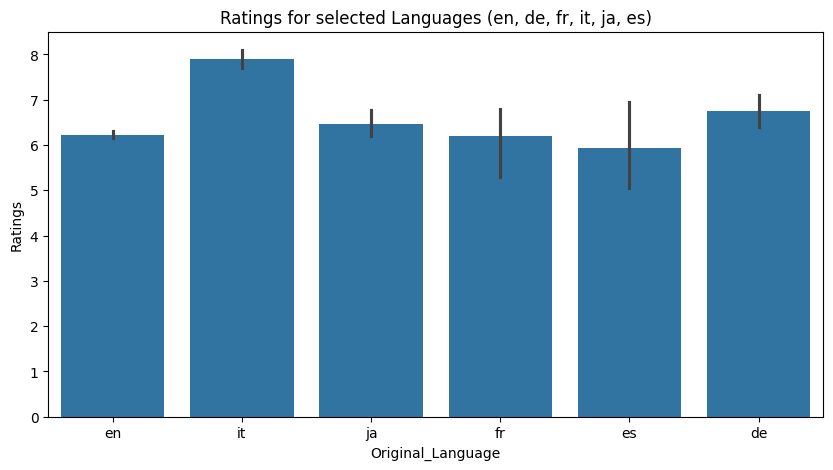

In [38]:
# Create the Bar Plot
plt.figure(figsize=(10,5))
sns.barplot(x="Original_Language", y="Ratings", data=filtered_df)
plt.title("Ratings for selected Languages (en, de, fr, it, ja, es)")
plt.show()

**Average Ratings vs. Runtime**

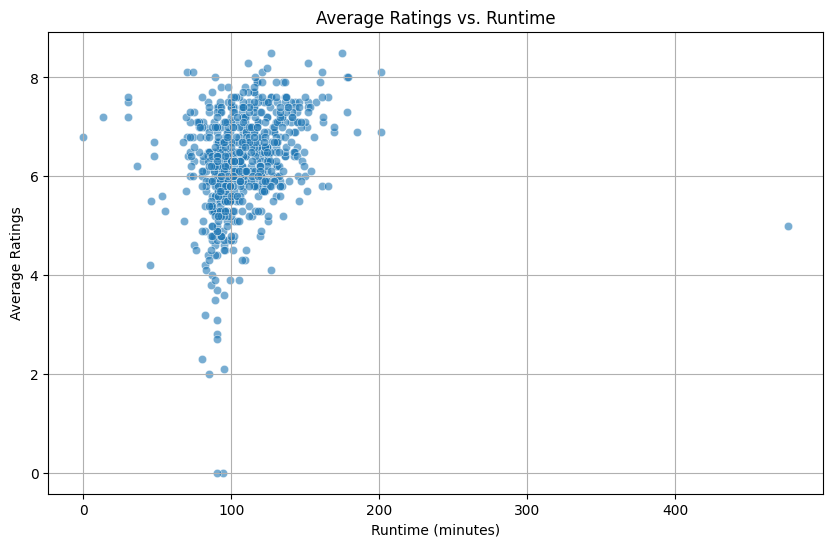

In [52]:
#Assuming 'Runtime' and 'Ratings' are columns in your dataframe

# Drop rows with missing values in 'Runtime' or 'Ratings'
movies_df_clean = movies_df.dropna(subset=['Runtime', 'Ratings'])

# Plotting
plt.figure(figsize=(10, 6))
sns.scatterplot(x=movies_df_clean['Runtime'], y=movies_df_clean['Ratings'], alpha=0.6)

plt.title('Average Ratings vs. Runtime')
plt.xlabel('Runtime (minutes)')
plt.ylabel('Average Ratings')
plt.grid(True)

plt.show()

**Top Production Companies by Revenue**

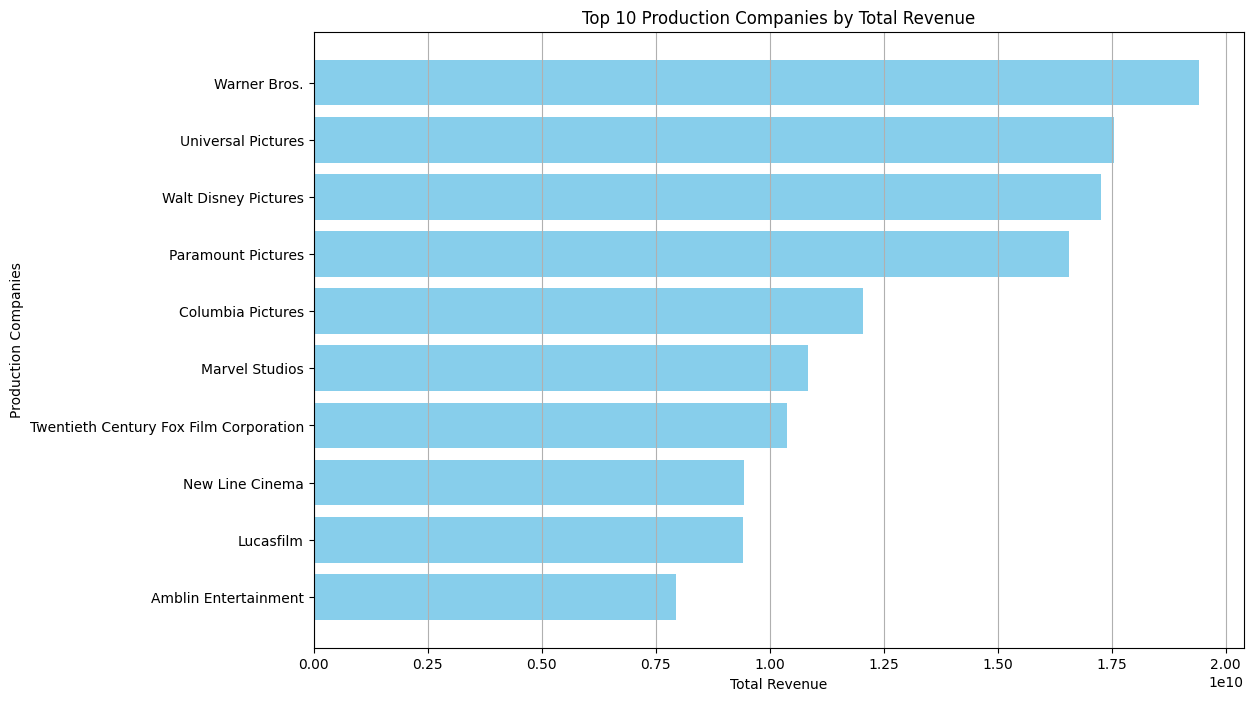

In [53]:
# Assuming 'Production_Companies' and 'Revenue' are columns in your dataframe

# Step 1: Explode the 'Production_Companies' column if it contains lists of companies
movies_df_exploded = movies_df.explode('Production_Companies')

# Step 2: Group by 'Production_Companies' and sum the 'Revenue'
company_revenue = movies_df_exploded.groupby('Production_Companies')['Revenue'].sum().reset_index()

# Step 3: Sort the companies by total revenue and select the top 10
top_companies = company_revenue.sort_values(by='Revenue', ascending=False).head(10)

# Step 4: Plotting
plt.figure(figsize=(12, 8))
plt.barh(top_companies['Production_Companies'], top_companies['Revenue'], color='skyblue')
plt.xlabel('Total Revenue')
plt.ylabel('Production Companies')
plt.title('Top 10 Production Companies by Total Revenue')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest revenue at the top
plt.grid(axis='x')

plt.show()

**Correlation Matrix of Key Variables**

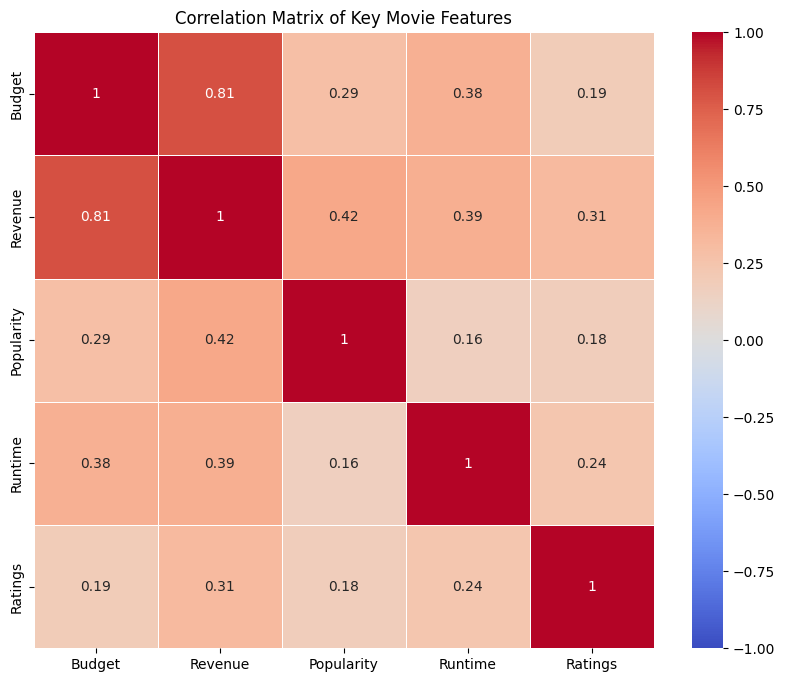

In [54]:
# Select the key numerical columns for correlation analysis
numerical_columns = ['Budget', 'Revenue', 'Popularity', 'Runtime', 'Ratings']

# Drop rows with missing values in these columns
movies_df_clean = movies_df[numerical_columns].dropna()

# Calculate the correlation matrix
correlation_matrix = movies_df_clean.corr()

# Plotting the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)

plt.title('Correlation Matrix of Key Movie Features')
plt.show()